In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import joblib
from itertools import groupby



In [44]:
df_ventas=r'C:\Users\cabal\Desktop\Datathon2025\Reto_Oxxo_DataKillers\Reto Oxxo\Venta.csv'
df_ventas=pd.read_csv(df_ventas)

tiends=r'C:\Users\cabal\Desktop\Datathon2025\Reto_Oxxo_DataKillers\Reto Oxxo\DIM_TIENDA.csv'
df_tiendas=pd.read_csv(tiends)

In [45]:
df_ventas

,TIENDA_ID,MES_ID,VENTA_TOTAL
0,813,202404,1042761.16
1,742,202404,604946.96
2,436,202404,2486787.81
3,732,202404,680701.78
4,282,202404,1227768.82
...,...,...,...
21376,885,202312,1157010.83
21377,793,202401,699916.91
21378,53,202401,1008108.28
21379,960,202401,1324156.07


In [46]:
df_tiendas

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
0,126,1,BC,Hogar,127.42,13,7,25.69107,-100.21261,Hogar Reunión,UT_DENSIDAD,TRAIN
1,681,1,C,Hogar,128.13,13,0,25.73571,-100.18086,Hogar Reunión,UT_DENSIDAD,TRAIN
2,117,1,C,Base,87.62,11,11,25.71883,-100.19133,Hogar Reunión,UT_DENSIDAD,TRAIN
3,682,1,C,Hogar,90.70,13,0,25.66952,-100.20744,Hogar Reunión,UT_DENSIDAD,TRAIN
4,275,1,C,Hogar,95.30,13,6,25.73766,-100.16116,Hogar Reunión,UT_DENSIDAD,TRAIN
...,...,...,...,...,...,...,...,...,...,...,...,...
946,572,6,C,Hogar,0.00,13,0,25.57330,-100.02196,Hogar Reunión,UT_DENSIDAD,TRAIN
947,492,6,B,Base,0.00,13,0,25.27251,-100.00065,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN
948,172,6,CD,Receso,122.70,8,0,25.19135,-99.81539,Parada Técnica,UT_CARRETERA_GAS,TRAIN
949,748,6,C,Receso,0.00,0,0,25.27433,-100.01648,Parada Técnica,UT_CARRETERA_GAS,TRAIN


In [47]:
combined=df_tiendas.merge(df_ventas,on='TIENDA_ID',how='right')

In [48]:
combined

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,MES_ID,VENTA_TOTAL
0,813,2.0,C,Hogar,0.00,0.0,0.0,25.99200,-98.11400,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,202404,1042761.16
1,742,5.0,C,Base,130.38,14.0,0.0,25.79436,-100.08207,Parada Técnica,UT_TRAFICO_VEHICULAR,TRAIN,202404,604946.96
2,436,3.0,BC,Hogar,0.00,13.0,0.0,25.54982,-100.22381,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,202404,2486787.81
3,732,5.0,C,Hogar,118.46,15.0,0.0,25.75866,-100.10849,Parada Técnica,UT_DENSIDAD,TRAIN,202404,680701.78
4,282,6.0,BC,Receso,114.00,13.0,0.0,24.85018,-99.57190,Parada Técnica,UT_CARRETERA_GAS,TRAIN,202404,1227768.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21376,885,2.0,B,Receso,110.15,10.0,9.0,25.98226,-98.09069,Oficinistas,UT_TRAFICO_PEATONAL,TRAIN,202312,1157010.83
21377,793,6.0,C,Base,109.40,0.0,0.0,25.19030,-99.81640,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,202401,699916.91
21378,53,6.0,C,Receso,103.21,12.0,10.0,25.15216,-99.84832,Parada Técnica,UT_CARRETERA_GAS,TRAIN,202401,1008108.28
21379,960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202401,1324156.07


In [70]:
df_completo_rellenado=r'C:\Users\cabal\Desktop\Datathon2025\data_completa.csv'
df_completo_rellenado=pd.read_csv(df_completo_rellenado)

In [ ]:
# Diccionario con metas por entorno
meta_dict = {
    "Base": 480000,
    "Hogar": 490000,
    "Peatonal": 420000,
    "Receso": 516000
}
df=combined.copy()
df['over_meta'] = df.apply(
    lambda row: row['VENTA_TOTAL'] > meta_dict.get(row['ENTORNO_DES'], float('inf')),
    axis=1
)

resultados = []

for tienda_id, grupo in df.groupby('TIENDA_ID'):
    valores = grupo.sort_values('MES_ID')['over_meta'].astype(int).tolist()

    prop_meses = sum(valores) / len(valores)

    max_racha = max((len(list(streak)) for val, streak in groupby(valores) if val == 1), default=0)
    prop_racha = max_racha / len(valores)
    succ = (prop_meses + prop_racha) / 2 #> 0.51

    resultados.append([tienda_id, prop_meses, prop_racha, succ])

df_metricas = pd.DataFrame(resultados, columns=[
    'TIENDA_ID',
    'prop_meses_sobre_meta',
    'prop_racha_sobre_meta',
    'succ'
])

df_final = df.merge(df_metricas, on='TIENDA_ID', how='left')

In [73]:
df_final

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,MES_ID,VENTA_TOTAL,over_meta,prop_meses_sobre_meta,prop_racha_sobre_meta,succ
0,813,2.0,C,Hogar,0.00,0.0,0.0,25.99200,-98.11400,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,202404,1042761.16,True,1.000000,1.000000,1.000000
1,742,5.0,C,Base,130.38,14.0,0.0,25.79436,-100.08207,Parada Técnica,UT_TRAFICO_VEHICULAR,TRAIN,202404,604946.96,True,0.428571,0.285714,0.357143
2,436,3.0,BC,Hogar,0.00,13.0,0.0,25.54982,-100.22381,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,202404,2486787.81,True,1.000000,1.000000,1.000000
3,732,5.0,C,Hogar,118.46,15.0,0.0,25.75866,-100.10849,Parada Técnica,UT_DENSIDAD,TRAIN,202404,680701.78,True,0.857143,0.761905,0.809524
4,282,6.0,BC,Receso,114.00,13.0,0.0,24.85018,-99.57190,Parada Técnica,UT_CARRETERA_GAS,TRAIN,202404,1227768.82,True,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21376,885,2.0,B,Receso,110.15,10.0,9.0,25.98226,-98.09069,Oficinistas,UT_TRAFICO_PEATONAL,TRAIN,202312,1157010.83,True,1.000000,1.000000,1.000000
21377,793,6.0,C,Base,109.40,0.0,0.0,25.19030,-99.81640,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,202401,699916.91,True,0.714286,0.714286,0.714286
21378,53,6.0,C,Receso,103.21,12.0,10.0,25.15216,-99.84832,Parada Técnica,UT_CARRETERA_GAS,TRAIN,202401,1008108.28,True,0.850000,0.500000,0.675000
21379,960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202401,1324156.07,False,0.000000,0.000000,0.000000


In [74]:
df_final.dropna(inplace=True)

In [75]:
df_final

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,MES_ID,VENTA_TOTAL,over_meta,prop_meses_sobre_meta,prop_racha_sobre_meta,succ
0,813,2.0,C,Hogar,0.00,0.0,0.0,25.99200,-98.11400,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,202404,1042761.16,True,1.000000,1.000000,1.000000
1,742,5.0,C,Base,130.38,14.0,0.0,25.79436,-100.08207,Parada Técnica,UT_TRAFICO_VEHICULAR,TRAIN,202404,604946.96,True,0.428571,0.285714,0.357143
2,436,3.0,BC,Hogar,0.00,13.0,0.0,25.54982,-100.22381,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,202404,2486787.81,True,1.000000,1.000000,1.000000
3,732,5.0,C,Hogar,118.46,15.0,0.0,25.75866,-100.10849,Parada Técnica,UT_DENSIDAD,TRAIN,202404,680701.78,True,0.857143,0.761905,0.809524
4,282,6.0,BC,Receso,114.00,13.0,0.0,24.85018,-99.57190,Parada Técnica,UT_CARRETERA_GAS,TRAIN,202404,1227768.82,True,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21375,539,6.0,B,Base,0.00,13.0,0.0,25.69036,-99.24230,Parada Técnica,UT_CARRETERA_GAS,TRAIN,202312,1413451.87,True,1.000000,1.000000,1.000000
21376,885,2.0,B,Receso,110.15,10.0,9.0,25.98226,-98.09069,Oficinistas,UT_TRAFICO_PEATONAL,TRAIN,202312,1157010.83,True,1.000000,1.000000,1.000000
21377,793,6.0,C,Base,109.40,0.0,0.0,25.19030,-99.81640,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,202401,699916.91,True,0.714286,0.714286,0.714286
21378,53,6.0,C,Receso,103.21,12.0,10.0,25.15216,-99.84832,Parada Técnica,UT_CARRETERA_GAS,TRAIN,202401,1008108.28,True,0.850000,0.500000,0.675000


In [ ]:
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Cargar y preparar data
df = df_final.copy()

# Codificar las columnas categóricas
enc_nivel = LabelEncoder()
enc_entorno = LabelEncoder()
enc_segmento = LabelEncoder()

df['NIVELSOCIOECONOMICO_DES'] = enc_nivel.fit_transform(df['NIVELSOCIOECONOMICO_DES'])
df['ENTORNO_DES'] = enc_entorno.fit_transform(df['ENTORNO_DES'])
df['SEGMENTO_MAESTRO_DESC'] = enc_segmento.fit_transform(df['SEGMENTO_MAESTRO_DESC'])

# Guardar encoders
joblib.dump(enc_nivel, "enc_nivel.pkl")
joblib.dump(enc_entorno, "enc_entorno.pkl")
joblib.dump(enc_segmento, "enc_segmento.pkl")

# --------------------------
# Variables de entrada y salida
X = df[['LATITUD_NUM', 'LONGITUD_NUM', 'PLAZA_CVE',
        'NIVELSOCIOECONOMICO_DES', 'ENTORNO_DES', 'SEGMENTO_MAESTRO_DESC']]

y = df['succ'].astype(float)  # continua entre 0 y 1

# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(X_train, y_train)

# --------------------------
# Evaluación
y_pred = model.predict(X_test)
print("🔎 R2:", r2_score(y_test, y_pred))
print("🔎 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Guardar modelo
joblib.dump(model, "modelo_regresion_succ.pkl")


🔎 R2: 0.9760465747447533
🔎 RMSE: 0.025516727976826782


['modelo_regresion_succ.pkl']

In [77]:
test=r'C:\Users\cabal\Desktop\Datathon2025\Reto_Oxxo_DataKillers\Reto Oxxo\DIM_TIENDA_TEST.csv'
test=pd.read_csv(test)
test

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
0,680,1,C,Hogar,102.36,13,0,25.65488,-100.21207,Hogar Reunión,UT_DENSIDAD,TEST
1,730,1,C,Hogar,97.43,14,0,25.66315,-100.22738,Hogar Reunión,UT_DENSIDAD,TEST
2,650,1,C,Hogar,117.01,13,0,25.66404,-100.22993,Hogar Reunión,UT_DENSIDAD,TEST
3,670,1,C,Base,109.76,13,0,25.66508,-100.26338,Hogar Reunión,UT_DENSIDAD,TEST
4,800,1,C,Peatonal,0.00,0,0,25.69367,-100.21433,Parada Técnica,UT_TRAFICO_PEATONAL,TEST
...,...,...,...,...,...,...,...,...,...,...,...,...
100,720,6,C,Hogar,0.00,0,0,25.60253,-99.99317,Hogar Reunión,UT_DENSIDAD,TEST
101,130,6,CD,Base,110.06,10,0,25.36439,-100.10202,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST
102,320,6,C,Hogar,122.00,10,0,25.57214,-100.01371,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST
103,510,6,B,Hogar,0.00,13,0,25.19747,-99.83198,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST


In [ ]:
import pandas as pd
import joblib

# Cargar modelo y encoders
model = joblib.load("modelo_regresion_succ.pkl")
enc_nivel = joblib.load("enc_nivel.pkl")
enc_entorno = joblib.load("enc_entorno.pkl")
enc_segmento = joblib.load("enc_segmento.pkl")

# Cargar test
test_path = r'C:\Users\cabal\Desktop\Datathon2025\Reto_Oxxo_DataKillers\Reto Oxxo\DIM_TIENDA_TEST.csv'
df_test = pd.read_csv(test_path)

# Codificar categóricas
df_test['NIVELSOCIOECONOMICO_DES'] = enc_nivel.transform(df_test['NIVELSOCIOECONOMICO_DES'])
df_test['ENTORNO_DES'] = enc_entorno.transform(df_test['ENTORNO_DES'])
df_test['SEGMENTO_MAESTRO_DESC'] = enc_segmento.transform(df_test['SEGMENTO_MAESTRO_DESC'])

# Preparar input
X_test = df_test[['LATITUD_NUM', 'LONGITUD_NUM', 'PLAZA_CVE',
                  'NIVELSOCIOECONOMICO_DES', 'ENTORNO_DES', 'SEGMENTO_MAESTRO_DESC']]

# Predecir
df_test['PRED_SUCC'] = model.predict(X_test)

# Ver resultados
print(df_test[['TIENDA_ID', 'LATITUD_NUM', 'LONGITUD_NUM', 'PRED_SUCC']])

# df_test.to_csv("predicciones_succ.csv", index=False)


     TIENDA_ID  LATITUD_NUM  LONGITUD_NUM  PRED_SUCC
0          680     25.65488    -100.21207   0.970869
1          730     25.66315    -100.22738   0.961878
2          650     25.66404    -100.22993   0.946716
3          670     25.66508    -100.26338   0.964266
4          800     25.69367    -100.21433   0.934389
..         ...          ...           ...        ...
100        720     25.60253     -99.99317   0.963458
101        130     25.36439    -100.10202   0.948136
102        320     25.57214    -100.01371   0.977153
103        510     25.19747     -99.83198   0.887158
104        500     25.60256    -100.08093   0.959785

[105 rows x 4 columns]


In [94]:
df_sorted_asc = df_test.sort_values(by='PRED_SUCC',ascending=False)


In [95]:
df_sorted_asc

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,PRED_SUCC
52,390,3,3,0,92.85,12,7,25.58368,-100.24482,2,UT_DENSIDAD,TEST,1.044710
8,260,1,5,1,119.20,12,11,25.68395,-100.20774,2,UT_DENSIDAD,TEST,1.030802
82,150,5,3,2,124.32,13,0,25.77799,-100.18660,3,UT_GAS_URBANA,TEST,1.024256
39,230,3,3,1,107.00,12,0,25.59252,-100.26626,2,UT_DENSIDAD,TEST,1.023841
83,570,5,4,1,107.57,13,0,25.82679,-100.21650,2,UT_DENSIDAD,TEST,1.016021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,790,1,4,1,0.00,0,0,25.73393,-100.16229,2,UT_TRAFICO_VEHICULAR,TEST,0.565667
7,210,1,5,0,127.37,12,10,25.70153,-100.13066,4,UT_CARRETERA_GAS,TEST,0.527070
51,140,3,1,0,96.44,10,0,25.65163,-100.36603,3,UT_TRAFICO_VEHICULAR,TEST,0.527020
35,920,2,4,3,103.26,10,10,26.04594,-98.32752,4,UT_GAS_URBANA,TEST,0.492740


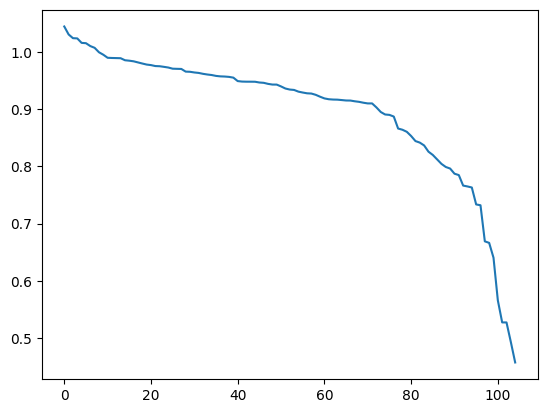

In [103]:
import matplotlib.pyplot as plt
x=np.arange(df_sorted_asc['TIENDA_ID'].nunique())
y=df_sorted_asc['PRED_SUCC'].values
plt.plot(x,y)


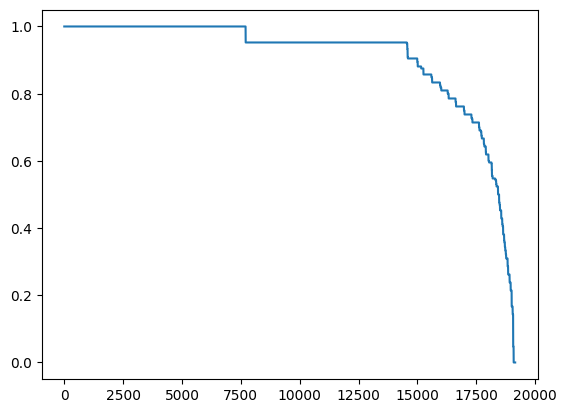

In [108]:
import matplotlib.pyplot as plt
df_sorted_final = df_final.sort_values(by='succ',ascending=False)

x=np.arange(19156)
y=df_sorted_final['succ'].values
plt.plot(x,y)


In [119]:
ventas=pd.read_csv(r'C:\Users\cabal\Desktop\Datathon2025\Reto_Oxxo_DataKillers\Reto Oxxo\Venta.csv')
dim_tiendas_test=pd.read_csv(r'C:\Users\cabal\Desktop\Datathon2025\Reto_Oxxo_DataKillers\Reto Oxxo\DIM_TIENDA_TEST.csv')

In [122]:
mapa_test_succ=df_sorted_asc[['TIENDA_ID','PRED_SUCC']]
tiendas_mapa_test_succ=mapa_test_succ['TIENDA_ID'].unique()


In [ ]:
mapa_test_succ

,TIENDA_ID,PRED_SUCC
52,390,1.044710
8,260,1.030802
82,150,1.024256
39,230,1.023841
83,570,1.016021
...,...,...
10,790,0.565667
7,210,0.527070
51,140,0.527020
35,920,0.492740


In [123]:
ventas_test=ventas[ventas['TIENDA_ID'].isin(tiendas_mapa_test_succ)]
tiendas_mapa_test_succ=ventas_test.merge(dim_tiendas_test,on='TIENDA_ID')

In [125]:
tiendas_mapa_test_succ

,TIENDA_ID,MES_ID,VENTA_TOTAL,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
0,250,202404,2019799.45,5,C,Hogar,118.93,13,6,25.76580,-100.23715,Hogar Reunión,UT_DENSIDAD,TEST
1,970,202404,959735.17,2,C,Peatonal,83.47,7,0,26.09231,-98.27756,Oficinistas,UT_TRAFICO_PEATONAL,TEST
2,400,202404,831299.01,5,C,Hogar,112.20,13,7,25.82921,-100.11680,Hogar Reunión,UT_DENSIDAD,TEST
3,450,202404,1208747.34,5,C,Hogar,105.24,13,9,25.81408,-100.08988,Parada Técnica,UT_DENSIDAD,TEST
4,380,202405,1178024.41,1,C,Base,101.66,13,10,25.70768,-100.17905,Oficinistas,UT_GAS_URBANA,TEST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,1000,202401,1029569.92,2,C,Hogar,101.82,12,10,26.01994,-98.28429,Hogar Reunión,UT_DENSIDAD,TEST
2124,640,202401,668567.17,5,C,Hogar,109.90,13,0,25.78546,-100.18814,Hogar Reunión,UT_DENSIDAD,TEST
2125,850,202401,6505.79,4,C,Peatonal,118.65,14,0,25.69801,-100.10738,Parada Técnica,UT_TRAFICO_VEHICULAR,TEST
2126,560,202312,1624049.08,1,C,Hogar,112.33,13,6,25.69058,-100.22989,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST


In [ ]:
import pandas as pd
from itertools import groupby
from sklearn.metrics import mean_squared_error, r2_score


df_pred = df_sorted_asc.copy()
df_real = tiendas_mapa_test_succ.copy()

meta_dict = {
    "Base": 480000,
    "Hogar": 490000,
    "Peatonal": 420000,
    "Receso": 516000
}

# Calcular over_meta en la real
df_real['over_meta'] = df_real.apply(
    lambda row: row['VENTA_TOTAL'] > meta_dict.get(row['ENTORNO_DES'], float('inf')),
    axis=1
)

# Calcular métricas por TIENDA_ID
resultados = []

for tienda_id, grupo in df_real.groupby('TIENDA_ID'):
    ventas_binarias = grupo.sort_values('MES_ID')['over_meta'].astype(int).tolist()
    prop_meses = sum(ventas_binarias) / len(ventas_binarias)
    max_racha = max([len(list(streak)) for val, streak in groupby(ventas_binarias) if val == 1], default=0)
    prop_racha = max_racha / len(ventas_binarias)
    succ_real = (prop_meses + prop_racha) / 2
    resultados.append([tienda_id, prop_meses, prop_racha, succ_real])

df_metrics_real = pd.DataFrame(resultados, columns=[
    'TIENDA_ID', 'prop_meses_sobre_meta', 'prop_racha_sobre_meta', 'succ_real'
])

# -----------------------------
# Unir con predicciones
df_valid = pd.merge(df_pred[['TIENDA_ID', 'PRED_SUCC']], df_metrics_real, on='TIENDA_ID', how='inner')

# Clasificación binaria
df_valid['pred_exitosa'] = df_valid['PRED_SUCC'] > 0.5
df_valid['real_exitosa'] = df_valid['succ_real'] > 0.5

# -----------------------------
# Métricas
rmse = mean_squared_error(df_valid['succ_real'], df_valid['PRED_SUCC'], squared=False)
r2 = r2_score(df_valid['succ_real'], df_valid['PRED_SUCC'])
accuracy = (df_valid['pred_exitosa'] == df_valid['real_exitosa']).mean()

# Resultados
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R²: {r2:.4f}")
print(f"✅ Clasificación binaria (succ > 0.5) accuracy: {accuracy:.4f}")

# Mostrar algunos errores
errores = df_valid[df_valid['pred_exitosa'] != df_valid['real_exitosa']]
print("\n🔎 Errores de clasificación:\n", errores[['TIENDA_ID', 'succ_real', 'PRED_SUCC']])


✅ RMSE: 0.1987
✅ R²: -0.0835
✅ Clasificación binaria (succ > 0.5) accuracy: 0.9524

🔎 Errores de clasificación:
      TIENDA_ID  succ_real  PRED_SUCC
17         770   0.000000   0.981842
66         820   0.000000   0.915128
90         660   0.452381   0.787203
96         870   0.500000   0.731999
103        920   0.642857   0.492740


c:\Users\cabal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [127]:
accuracy

0.9523809523809523

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
import pandas as pd

# Asumimos que ya tienes:
# df_pred = df_sorted_asc[['TIENDA_ID', 'PRED_SUCC']]
# df_metrics_real = DataFrame con ['TIENDA_ID', 'succ_real']

# -----------------------------
# 1. Unir ambos DataFrames por TIENDA_ID
df_valid = pd.merge(df_pred[['TIENDA_ID', 'PRED_SUCC']], df_metrics_real, on='TIENDA_ID', how='inner')

# 2. Clasificación binaria
df_valid['pred_exitosa'] = (df_valid['PRED_SUCC'] > 0.5).astype(int)
df_valid['real_exitosa'] = (df_valid['succ_real'] > 0.5).astype(int)

# -----------------------------
# 3. Métricas
cm = confusion_matrix(df_valid['real_exitosa'], df_valid['pred_exitosa'])
f1 = f1_score(df_valid['real_exitosa'], df_valid['pred_exitosa'])
precision = precision_score(df_valid['real_exitosa'], df_valid['pred_exitosa'])
recall = recall_score(df_valid['real_exitosa'], df_valid['pred_exitosa'])
accuracy = accuracy_score(df_valid['real_exitosa'], df_valid['pred_exitosa'])

# -----------------------------
# 4. Mostrar resultados
print("📊 Matriz de Confusión:")
print(cm)

print("\n📈 Métricas de Clasificación:")
print(f"✅ Accuracy  : {accuracy:.4f}")
print(f"✅ Precision : {precision:.4f}")
print(f"✅ Recall    : {recall:.4f}")
print(f"✅ F1-score  : {f1:.4f}")

# (opcional) Reporte completo
print("\n📋 Classification Report:")
print(classification_report(df_valid['real_exitosa'], df_valid['pred_exitosa']))


📊 Matriz de Confusión:
[[ 1  4]
 [ 1 99]]

📈 Métricas de Clasificación:
✅ Accuracy  : 0.9524
✅ Precision : 0.9612
✅ Recall    : 0.9900
✅ F1-score  : 0.9754

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.96      0.99      0.98       100

    accuracy                           0.95       105
   macro avg       0.73      0.59      0.63       105
weighted avg       0.94      0.95      0.94       105

